In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
data=data.dropna(subset=['Rainfall','RainTomorrow'])

droping the na rows from label columns 

In [7]:
data.shape

(8079, 23)

In [8]:
data.isnull().sum()

Date                0
Location            0
MinTemp            48
MaxTemp            34
Rainfall            0
Evaporation      3377
Sunshine         3839
WindGustDir       945
WindGustSpeed     945
WindDir9am        795
WindDir3pm        283
WindSpeed9am       49
WindSpeed3pm       83
Humidity9am        36
Humidity3pm        80
Pressure9am      1285
Pressure3pm      1286
Cloud9am         2207
Cloud3pm         2247
Temp9am            33
Temp3pm            74
RainToday           0
RainTomorrow        0
dtype: int64

In [9]:
#data=data.drop(['Date','Location'],axis=1)

In [10]:
data['Day']=pd.to_datetime(data.Date,format="%Y/%m/%d").dt.year

In [11]:
data['month']=pd.to_datetime(data.Date,format="%Y/%m/%d").dt.month

In [12]:
data=data.drop(['Date'],axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['WindGustDir'])
data['WindGustDir']=df

In [15]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['WindDir9am'])
data['WindDir9am']=df1

In [16]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(data['WindDir3pm'])
data['WindDir3pm']=df2

In [17]:
lab_enc=LabelEncoder()
df3=lab_enc.fit_transform(data['RainToday'])
data['RainToday']=df3

In [18]:
lab_enc=LabelEncoder()
df4=lab_enc.fit_transform(data['RainTomorrow'])
data['RainTomorrow']=df4

In [19]:
lab_enc=LabelEncoder()
df5=lab_enc.fit_transform(data['Location'])
data['Location']=df5

applying the knn imputers to fill the values 

In [20]:
from sklearn.impute import KNNImputer 

In [21]:
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[['MinTemp', 'MaxTemp', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']]))
knn_imp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,13.4,22.9,18.600000,9.466667,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.666667,16.9,21.8
1,7.4,25.1,4.800000,10.066667,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3
2,12.9,25.7,5.133333,11.666667,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.000000,2.000000,21.0,23.2
3,9.2,28.0,4.800000,11.200000,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.000000,1.333333,18.1,26.5
4,17.5,32.3,3.133333,8.833333,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,3.5,21.8,1.933333,9.500000,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.666667,2.666667,9.4,20.9
8075,2.8,23.4,2.400000,9.600000,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.333333,2.666667,10.1,22.4
8076,3.6,25.3,4.000000,10.166667,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.000000,1.000000,10.9,24.5
8077,5.4,26.9,3.266667,10.333333,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.333333,0.666667,12.5,26.1


In [22]:
knn_imp.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [23]:
data[['MinTemp', 'MaxTemp', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']]=knn_imp

In [24]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
0,1,13.4,22.9,0.6,18.600000,9.466667,13.0,44.0,13.0,14.0,...,1007.7,1007.1,8.000000,2.666667,16.9,21.8,0,0,2008,12
1,1,7.4,25.1,0.0,4.800000,10.066667,14.0,44.0,6.0,15.0,...,1010.6,1007.8,0.666667,1.333333,17.2,24.3,0,0,2008,12
2,1,12.9,25.7,0.0,5.133333,11.666667,15.0,46.0,13.0,15.0,...,1007.6,1008.7,1.000000,2.000000,21.0,23.2,0,0,2008,12
3,1,9.2,28.0,0.0,4.800000,11.200000,4.0,24.0,9.0,0.0,...,1017.6,1012.8,1.000000,1.333333,18.1,26.5,0,0,2008,12
4,1,17.5,32.3,1.0,3.133333,8.833333,13.0,41.0,1.0,7.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12


In [25]:
data.isnull().sum()

Location           0
MinTemp          345
MaxTemp          345
Rainfall           0
Evaporation      345
Sunshine         345
WindGustDir      345
WindGustSpeed    345
WindDir9am       345
WindDir3pm       345
WindSpeed9am     345
WindSpeed3pm     345
Humidity9am      345
Humidity3pm      345
Pressure9am      345
Pressure3pm      345
Cloud9am         345
Cloud3pm         345
Temp9am          345
Temp3pm          345
RainToday          0
RainTomorrow       0
Day                0
month              0
dtype: int64

In [26]:
data=data.dropna(subset=['MinTemp','MaxTemp','Evaporation',
       'Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm',
       'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
       'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
       'Temp3pm'])

In [27]:
data.shape

(7734, 24)

In [28]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
count,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,...,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000
mean,5.800362,13.076804,23.828648,2.818981,5.178153,7.399629,8.741660,39.327817,8.507499,8.073054,...,1017.781721,1015.312525,4.281140,4.310275,17.701569,22.394462,0.246444,0.242048,2012.049134,6.379364
std,3.214633,5.439398,6.160218,10.433200,5.378835,3.712337,5.200839,14.525002,5.021009,4.682161,...,6.616236,6.548803,2.732220,2.579483,5.645875,5.997446,0.430968,0.428351,2.502484,3.449155
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000
25%,3.000000,9.100000,19.200000,0.000000,2.466667,4.600000,4.000000,30.000000,4.000000,4.000000,...,1013.400000,1010.600000,1.333333,2.000000,13.600000,18.000000,0.000000,0.000000,2010.000000,3.000000
50%,6.000000,13.100000,23.200000,0.000000,4.100000,8.200000,9.000000,37.000000,9.000000,8.000000,...,1017.800000,1015.400000,4.666667,4.333333,17.700000,21.800000,0.000000,0.000000,2011.000000,6.000000
75%,8.000000,17.300000,28.000000,1.000000,6.600000,10.400000,13.000000,48.000000,13.000000,12.000000,...,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,2014.000000,9.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,16.000000,107.000000,16.000000,16.000000,...,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,2017.000000,12.000000


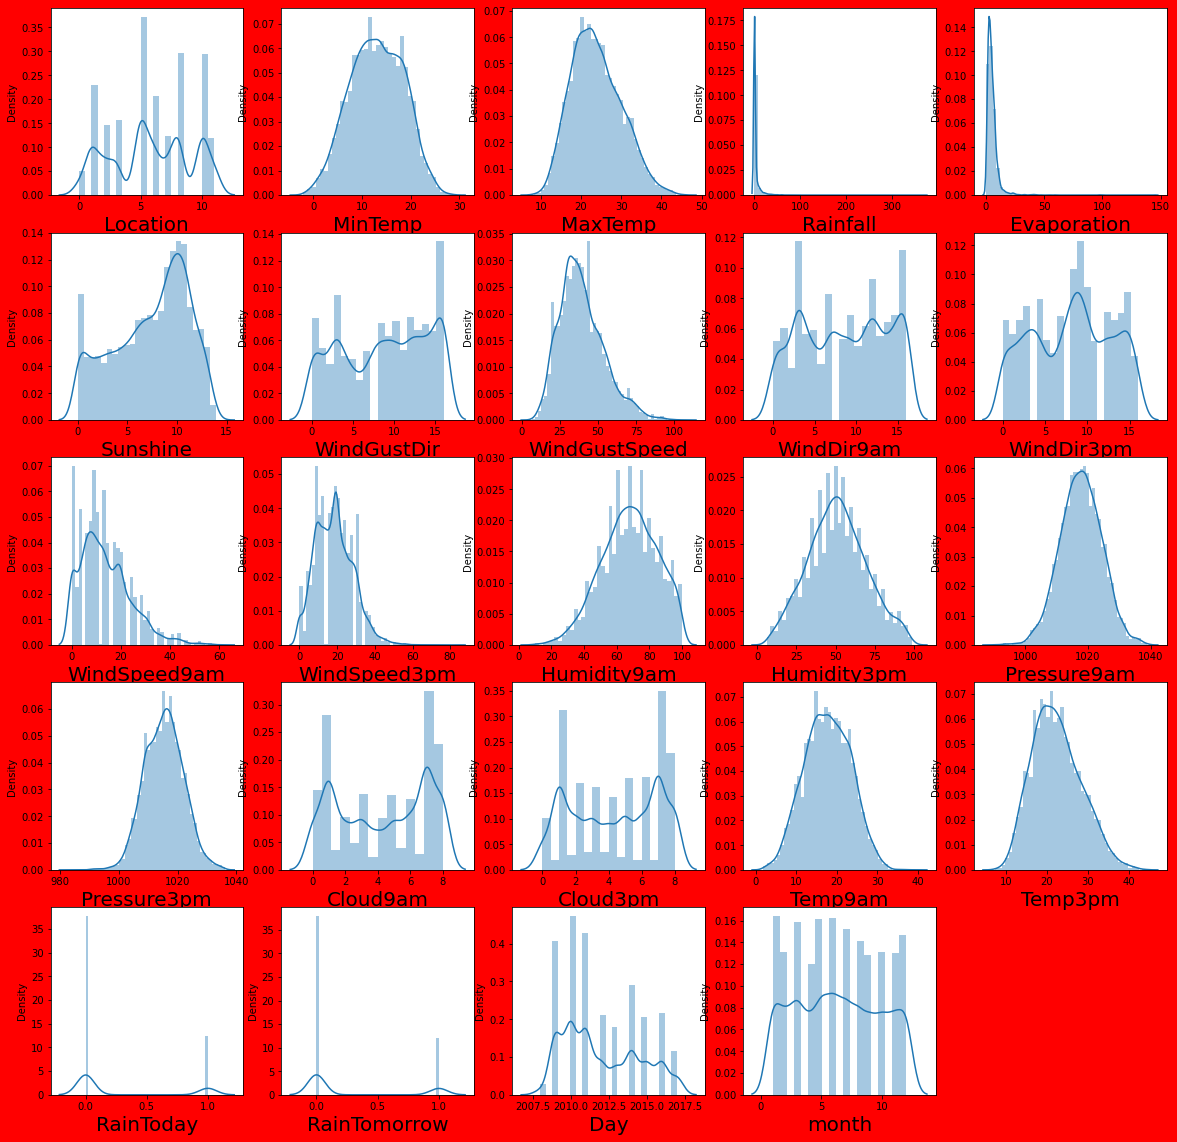

In [29]:
plt.figure(figsize=(20,20),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

considering the outliers for continous data only ignoring for labels and categorical data

# APPLYING THE Z SCORE METHOD TO REMOVE OUTLIERS

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(data))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
0,1.493381,0.059421,0.150759,0.212698,2.495469,0.556838,0.818832,0.321686,0.894798,1.265939,...,1.523884,1.254131,1.361201,0.637226,0.141983,0.099126,0.571876,0.565106,1.618151,1.629674
1,1.493381,1.043713,0.206394,0.270211,0.070308,0.718472,1.011121,0.321686,0.499434,1.479529,...,1.085540,1.147234,1.322993,1.154159,0.088844,0.317745,0.571876,0.565106,1.618151,1.629674
2,1.493381,0.032506,0.303800,0.270211,0.008333,1.149495,1.203410,0.459388,0.894798,1.479529,...,1.538999,1.009796,1.200984,0.895693,0.584257,0.134322,0.571876,0.565106,1.618151,1.629674
3,1.493381,0.712773,0.677187,0.270211,0.070308,1.023780,0.911769,1.055339,0.098094,1.724327,...,0.027468,0.383687,1.200984,1.154159,0.070575,0.684592,0.571876,0.565106,1.618151,1.629674
4,1.493381,0.813230,1.375260,0.174357,0.380185,0.386225,0.818832,0.115132,1.495314,0.229194,...,1.055309,1.422111,0.995175,1.430505,0.017435,1.218187,0.571876,0.565106,1.618151,1.629674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,0.684302,1.760751,0.329336,0.270211,0.603296,0.565818,1.680926,0.573381,1.296138,1.724327,...,1.045719,0.899074,1.322993,0.637226,1.470473,0.249199,0.571876,0.565106,0.779622,0.689884
8075,0.684302,1.889450,0.069588,0.270211,0.516530,0.592757,1.680926,0.573381,0.098094,1.510736,...,1.030604,0.761635,1.078975,0.637226,1.346480,0.000924,0.571876,0.565106,0.779622,0.689884
8076,0.684302,1.742365,0.238863,0.270211,0.219049,0.745411,0.527191,1.193042,0.098094,1.083556,...,0.864336,0.578384,1.200984,1.283392,1.204775,0.351095,0.571876,0.565106,0.779622,0.689884
8077,0.684302,1.411425,0.498611,0.270211,0.355395,0.790309,1.104059,0.160273,0.098094,1.265939,...,0.486453,0.227152,1.445001,1.412625,0.921364,0.617893,0.571876,0.565106,0.779622,0.689884


In [32]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([   0,    0,    0, ..., 7733, 7733, 7733], dtype=int64), array([ 0,  1,  2, ..., 21, 22, 23], dtype=int64))
(7734, 24)


In [33]:
data=data[(z<3).all(axis=1)]
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
0,1,13.4,22.9,0.6,18.600000,9.466667,13.0,44.0,13.0,14.0,...,1007.7,1007.1,8.000000,2.666667,16.9,21.8,0,0,2008,12
1,1,7.4,25.1,0.0,4.800000,10.066667,14.0,44.0,6.0,15.0,...,1010.6,1007.8,0.666667,1.333333,17.2,24.3,0,0,2008,12
2,1,12.9,25.7,0.0,5.133333,11.666667,15.0,46.0,13.0,15.0,...,1007.6,1008.7,1.000000,2.000000,21.0,23.2,0,0,2008,12
3,1,9.2,28.0,0.0,4.800000,11.200000,4.0,24.0,9.0,0.0,...,1017.6,1012.8,1.000000,1.333333,18.1,26.5,0,0,2008,12
4,1,17.5,32.3,1.0,3.133333,8.833333,13.0,41.0,1.0,7.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,8,3.5,21.8,0.0,1.933333,9.500000,0.0,31.0,2.0,0.0,...,1024.7,1021.2,0.666667,2.666667,9.4,20.9,0,0,2014,4
8075,8,2.8,23.4,0.0,2.400000,9.600000,0.0,31.0,9.0,1.0,...,1024.6,1020.3,1.333333,2.666667,10.1,22.4,0,0,2014,4
8076,8,3.6,25.3,0.0,4.000000,10.166667,6.0,22.0,9.0,3.0,...,1023.5,1019.1,1.000000,1.000000,10.9,24.5,0,0,2014,4
8077,8,5.4,26.9,0.0,3.266667,10.333333,3.0,37.0,9.0,14.0,...,1021.0,1016.8,0.333333,0.666667,12.5,26.1,0,0,2014,4


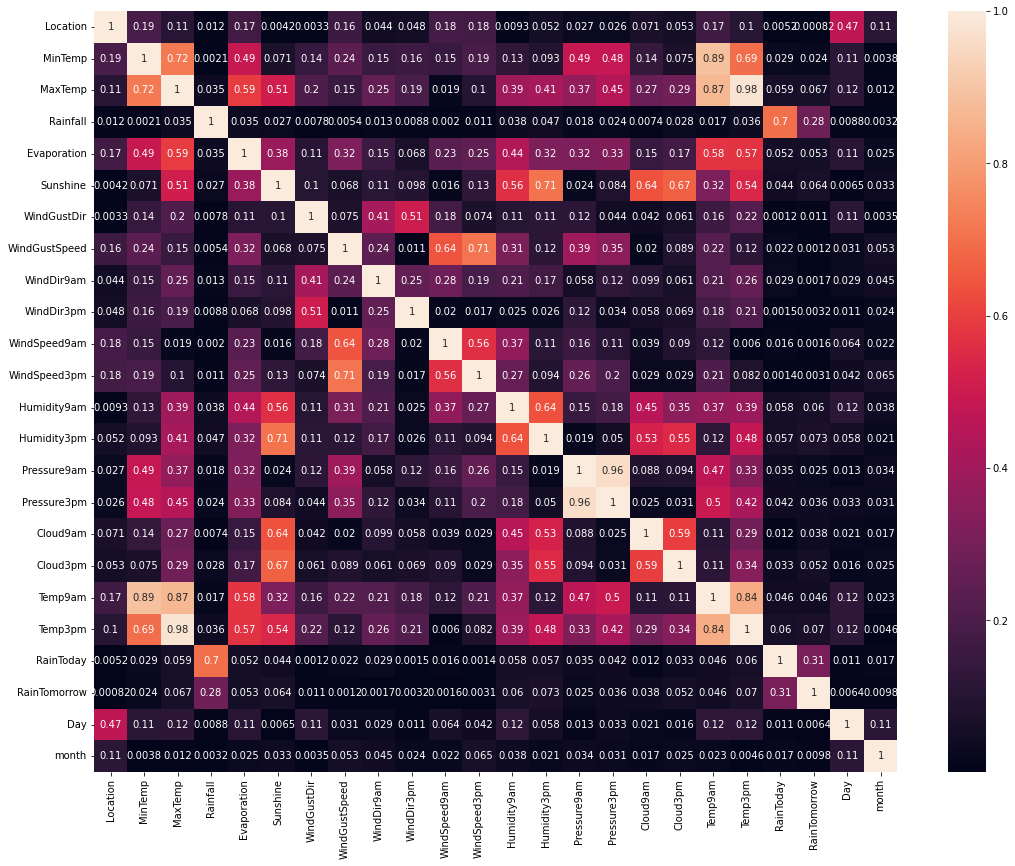

In [34]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

MAXTEMP AND temp9,temp3 are very closely corelated to each other so droping the columns temp3 and temp9

In [35]:
data=data.drop(['Temp9am','Temp3pm'],axis=1)

SPLITING THE DATA INTO FEATURES AND LABELS

In [36]:
X=data.drop(['RainTomorrow','Rainfall'],1)
z=data['Rainfall']
y=data['RainTomorrow']

In [37]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=49)
y_train.head()

4069    0
7465    0
7931    0
4982    1
4750    0
Name: RainTomorrow, dtype: int32

# KNN NEIGHBORS

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1285,  132],
       [ 316,  102]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1417
           1       0.44      0.24      0.31       418

    accuracy                           0.76      1835
   macro avg       0.62      0.58      0.58      1835
weighted avg       0.72      0.76      0.73      1835



# DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
clf.score(x_train,y_train)

1.0

In [50]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.6724795640326976

In [51]:
cfm=confusion_matrix(y_test,y_pred1)
cfm

array([[1099,  318],
       [ 283,  135]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred1,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1417
           1       0.30      0.32      0.31       418

    accuracy                           0.67      1835
   macro avg       0.55      0.55      0.55      1835
weighted avg       0.68      0.67      0.68      1835



In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.64237057, 0.67915531, 0.67098093, 0.58855586, 0.62576687])

In [55]:
cross_val_score(clf, X, y, cv=10).mean()

0.6239386121757102

# RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=25, random_state=0)

In [58]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [59]:
y_pred2= rfc.predict(x_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[1297  120]
 [ 329   89]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1417
           1       0.43      0.21      0.28       418

    accuracy                           0.76      1835
   macro avg       0.61      0.56      0.57      1835
weighted avg       0.71      0.76      0.72      1835

0.7553133514986377


In [61]:
scores = cross_val_score(rfc, X, y, cv=10)
scores

array([0.76566757, 0.7493188 , 0.75613079, 0.74114441, 0.70572207,
       0.70844687, 0.72615804, 0.72343324, 0.76158038, 0.7585266 ])

In [62]:
cross_val_score(rfc, X, y, cv=10).mean()

0.7396128782837877

choosing randomforest classifier for predicting rainfall tomorrow

# HYPERPARAMETER TUNING

In [63]:
rc = RandomForestClassifier(random_state=26)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3, 5,7,13],
    'min_samples_leaf': [2, 3, 4, 5,],
    'criterion': ["gini", "entropy"]
}

In [66]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rc, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, scoring = "accuracy")

In [67]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=26), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 13],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='accuracy')

In [68]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=5, random_state=26)

In [69]:
gd=grid_search.best_estimator_

In [70]:
rfc = RandomForestClassifier(max_depth=7, min_samples_leaf=3, random_state=26)

In [71]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, random_state=26)

In [72]:
rfc.score(x_train,y_train)

0.7966933139534884

In [73]:
y_pred3=rfc.predict(x_test)

In [74]:
cfm=confusion_matrix(y_test,y_pred3)
cfm

array([[1394,   23],
       [ 399,   19]], dtype=int64)

In [75]:
print(classification_report(y_test,y_pred2,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1417
           1       0.43      0.21      0.28       418

    accuracy                           0.76      1835
   macro avg       0.61      0.56      0.57      1835
weighted avg       0.71      0.76      0.72      1835



APPLYING REGRESSION FOR RAINFALL PREDICTION

In [76]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_scaled,z,test_size=.25,random_state=62)
y_train1.head()

2771    0.0
2342    0.0
2728    0.0
1942    0.0
3863    0.0
Name: Rainfall, dtype: float64

# LINEAR REGRESSION

In [77]:
regression=LinearRegression()
regression.fit(x_train1,y_train1)

LinearRegression()

In [78]:
regression.score(x_train1,y_train1)

0.49330062165593236

In [79]:
regression.score(x_test1,y_test1)

0.471464564251857

In [80]:
y_pred4=regression.predict(x_test1)

In [81]:
y_pred4

array([ 0.10986004, -0.06948379,  0.04777229, ...,  7.90794526,
        0.32685438,  0.17637096])

# ADABOOSTREGRESSOR

In [82]:
from sklearn.ensemble import AdaBoostRegressor

In [83]:
ada=AdaBoostRegressor()

In [84]:
ada.fit(x_train1,y_train1)

AdaBoostRegressor()

In [85]:
y_pred5=ada.predict(x_train1)

In [86]:
from sklearn import metrics

In [87]:
accuracy=metrics.r2_score(y_train1,y_pred5)
accuracy

0.41351543172941907

In [88]:
y_test_pred=ada.predict(x_test1)

In [89]:
accuracy=metrics.r2_score(y_test1,y_test_pred)
accuracy

0.39843468260520853

# XGB BOOSTER

In [90]:
import xgboost as xgb

In [91]:
xgb=xgb.XGBRegressor()

In [92]:
xgb.fit(x_train1,y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [93]:
y_pred6=xgb.predict(x_test1)
y_pred6

array([ 0.11174966, -0.02440465, -0.1393443 , ...,  3.5290735 ,
        0.20898439,  0.278785  ], dtype=float32)

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_test1,y_pred6)

0.4140652861395978

# RANDOM FOREST REGRESSOR

In [96]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train1, y_train1)
y_pred8 = regressor.predict(x_test1)

In [97]:
y_pred8

array([0.06, 0.02, 0.05, ..., 5.06, 0.02, 0.05])

In [98]:
r2_score(y_test1,y_pred8)

0.46614395988458746

In [99]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred8))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred8))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred8)))

Mean Absolute Error: 1.3796993642143507
Mean Squared Error: 12.70557091886164
Root Mean Squared Error: 3.564487469309107


# From above results linear regression has been choosen

In [100]:
import pickle

In [101]:
filename='rainfall_tomorrow'
pickle.dump(rfc,open(filename,'wb'))
loaded_model1=pickle.load(open(filename,'rb'))

In [102]:
filename='rainfall_prediction'
pickle.dump(regression,open(filename,'wb'))
loaded_model2=pickle.load(open(filename,'rb'))